In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle as pk


In [8]:
# Load your dataset (adjust the path if needed)
df = pd.read_csv('all_data.csv')
# Set the Date column as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [9]:
df

,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Open,gold_High,gold_Low,gold_Close,...,silver_Vol.,silver_Change %,dollar_rate_Price,dollar_rate_Open,dollar_rate_High,dollar_rate_Low,dollar_rate_Change %,cpi_CPI,ppi_PPI,is_holiday
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,98.70,98.61,98.76,98.54,NaN,0.28,NaN,NaN,NaN,NaN,...,NaN,NaN,80.03,80.21,80.24,80.10,0.00,235.288,203.800,1
2014-01-02,95.44,98.50,98.97,95.34,251250.0,-3.30,117.930000,118.730003,117.750000,118.000000,...,44690.0,3.91,80.63,80.12,80.71,80.08,0.75,235.288,203.800,0
2014-01-03,93.96,95.47,95.74,93.86,215520.0,-1.55,118.639999,119.620003,118.589996,119.290001,...,30030.0,0.41,80.79,80.57,80.89,80.49,0.20,235.288,203.800,0
2014-01-06,93.43,94.18,94.59,93.20,189380.0,-0.56,119.760002,120.389999,117.110001,119.500000,...,38850.0,-0.53,80.65,80.86,80.91,80.54,-0.17,235.288,203.800,0
2014-01-07,93.67,93.60,94.22,93.35,177180.0,0.26,118.459999,118.919998,118.129997,118.820000,...,38360.0,-1.57,80.83,80.69,80.95,80.60,0.22,235.288,203.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,75.56,77.28,77.69,75.52,365120.0,-2.21,233.449997,233.500000,232.059998,232.759995,...,61460.0,-1.93,104.66,104.37,104.67,104.14,0.27,313.049,255.419,0
2024-08-27,75.56,77.28,77.69,75.52,365120.0,-2.21,231.690002,233.470001,231.570007,233.389999,...,61460.0,-1.93,104.66,104.37,104.67,104.14,0.27,313.049,255.419,0
2024-08-28,75.56,77.28,77.69,75.52,365120.0,-2.21,232.000000,232.020004,230.729996,231.750000,...,61460.0,-1.93,104.66,104.37,104.67,104.14,0.27,313.049,255.419,0


In [17]:
# adding columns to predict - dependent on number of days
num_days = 5 # Number of days to predict
# Prepare target columns for x-day predictions
for i in range(1, num_days + 1):
    df[f'target_day_{i}'] = df['gold_Close'].shift(-i)

# Drop rows with NaN values from shifting
df = df.dropna()
# Predict tomorrow price based on today + 3 last days
df['gold_price_yesterday'] = df['gold_Close'].shift(1)
df['gold_price_2days'] = df['gold_Close'].shift(2)
df['gold_price_3days'] = df['gold_Close'].shift(3)
# Separate features and targets
X = df.drop(columns=[f'target_day_{i}' for i in range(1, num_days + 1)])
y = df[[f'target_day_{i}' for i in range(1, num_days + 1)]]
df

/var/folders/zp/tjm6hdl95rjgm9v39jqzvwb00000gq/T/ipykernel_41408/2765791420.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'target_day_{i}'] = df['gold_Close'].shift(-i)
/var/folders/zp/tjm6hdl95rjgm9v39jqzvwb00000gq/T/ipykernel_41408/2765791420.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'target_day_{i}'] = df['gold_Close'].shift(-i)
/var/folders/zp/tjm6hdl95rjgm9v39jqzvwb00000gq/T/ipykernel_41408/2765791420.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Open,gold_High,gold_Low,gold_Close,...,ppi_PPI,is_holiday,target_day_1,gold_price_yesterday,gold_price_2days,gold_price_3days,target_day_2,target_day_3,target_day_4,target_day_5
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-07,93.67,93.60,94.22,93.35,177180.0,0.26,118.459999,118.919998,118.129997,118.820000,...,203.800,0,118.120003,NaN,NaN,NaN,118.459999,120.260002,121.019997,119.889999
2014-01-08,92.33,93.96,94.18,92.26,244860.0,-1.43,117.989998,118.519997,117.500000,118.120003,...,203.800,0,118.459999,118.820000,NaN,NaN,120.260002,121.019997,119.889999,119.660004
2014-01-09,91.66,92.58,92.93,91.24,255780.0,-0.73,118.110001,118.690002,117.989998,118.459999,...,203.800,0,120.260002,118.120003,118.820000,NaN,121.019997,119.889999,119.660004,119.790001
2014-01-10,92.72,92.30,93.38,91.99,255990.0,1.16,119.720001,120.430000,119.580002,120.260002,...,203.800,0,121.019997,118.459999,118.120003,118.820000,119.889999,119.660004,119.790001,120.930000
2014-01-13,91.80,92.83,92.88,91.43,212210.0,-0.99,120.269997,121.040001,120.199997,121.019997,...,203.800,0,119.889999,120.260002,118.459999,118.120003,119.660004,119.790001,120.930000,120.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-16,75.56,77.28,77.69,75.52,365120.0,-2.21,229.990005,232.020004,229.009995,231.990005,...,255.419,0,231.610001,226.910004,226.199997,228.059998,232.460007,232.149994,229.369995,232.020004
2024-08-19,75.56,77.28,77.69,75.52,365120.0,-2.21,230.149994,231.779999,229.740005,231.610001,...,255.419,0,232.460007,231.990005,226.910004,226.199997,232.149994,229.369995,232.020004,232.759995
2024-08-20,75.56,77.28,77.69,75.52,365120.0,-2.21,233.710007,234.009995,231.130005,232.460007,...,255.419,0,232.149994,231.610001,231.990005,226.910004,229.369995,232.020004,232.759995,233.389999


In [23]:
#X = df.drop(columns=['gold_Close', 'gold_Open', 'gold_High', 'gold_Adj Close', 'gold_Low', 'gold_Volume'])
# Extract y
#y = df['gold_price_to_predict']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# Drop rows with NaN in X_train and y_train
X_train_dropped = X_train.dropna()
y_train_dropped = y_train.loc[X_train_dropped.index]

# Drop rows with NaN in X_test and y_test
X_test_dropped = X_test.dropna()
y_test_dropped = y_test.loc[X_test_dropped.index]

# Ensure that y_test_dropped does not contain NaN values
X_test_dropped = X_test_dropped.dropna()
y_test_dropped = y_test_dropped.dropna()

# Check if indices still match after dropping NaNs
common_index = X_test_dropped.index.intersection(y_test_dropped.index)
X_test_dropped = X_test_dropped.loc[common_index]
y_test_dropped = y_test_dropped.loc[common_index]

print(y_train_dropped)

            crude_oil_Price  crude_oil_Open  crude_oil_High  crude_oil_Low  \
Date                                                                         
2014-01-07            93.67           93.60           94.22          93.35   
2014-01-08            92.33           93.96           94.18          92.26   
2014-01-09            91.66           92.58           92.93          91.24   
2014-01-10            92.72           92.30           93.38          91.99   
2014-01-13            91.80           92.83           92.88          91.43   
...                     ...             ...             ...            ...   
2022-07-08           104.79          102.22          105.24         101.51   
2022-07-11           104.09          104.79          105.05         100.89   
2022-07-12            95.84          103.46          103.49          95.35   
2022-07-13            96.30           95.89           97.96          93.67   
2022-07-14            95.78           96.57           97.00     

In [19]:
y_train_dropped

,target_day_1,target_day_2,target_day_3,target_day_4,target_day_5
Date,,,,,
2014-01-10,121.019997,119.889999,119.660004,119.790001,120.930000
2014-01-13,119.889999,119.660004,119.790001,120.930000,120.930000
2014-01-14,119.660004,119.790001,120.930000,120.930000,119.699997
2014-01-15,119.790001,120.930000,120.930000,119.699997,119.190002
2014-01-16,120.930000,120.930000,119.699997,119.190002,121.790001
...,...,...,...,...,...
2022-07-08,161.429993,160.830002,161.600006,159.330002,159.009995
2022-07-11,160.830002,161.600006,159.330002,159.009995,159.160004
2022-07-12,161.600006,159.330002,159.009995,159.160004,159.539993


Combined Actual Data (Head):
            target_day_1  target_day_2  target_day_3  target_day_4  \
Date                                                                 
2014-01-10    121.019997    119.889999    119.660004    119.790001   
2014-01-13    119.889999    119.660004    119.790001    120.930000   
2014-01-14    119.660004    119.790001    120.930000    120.930000   
2014-01-15    119.790001    120.930000    120.930000    119.699997   
2014-01-16    120.930000    120.930000    119.699997    119.190002   

            target_day_5  
Date                      
2014-01-10    120.930000  
2014-01-13    120.930000  
2014-01-14    119.699997  
2014-01-15    119.190002  
2014-01-16    121.790001  
Predictions Data (Head):
            Predicted Day 1  Predicted Day 2  Predicted Day 3  \
Date                                                            
2022-07-15       158.990822       159.303957       159.092964   
2022-07-18       158.923300       159.262495       159.026074   
2022-0

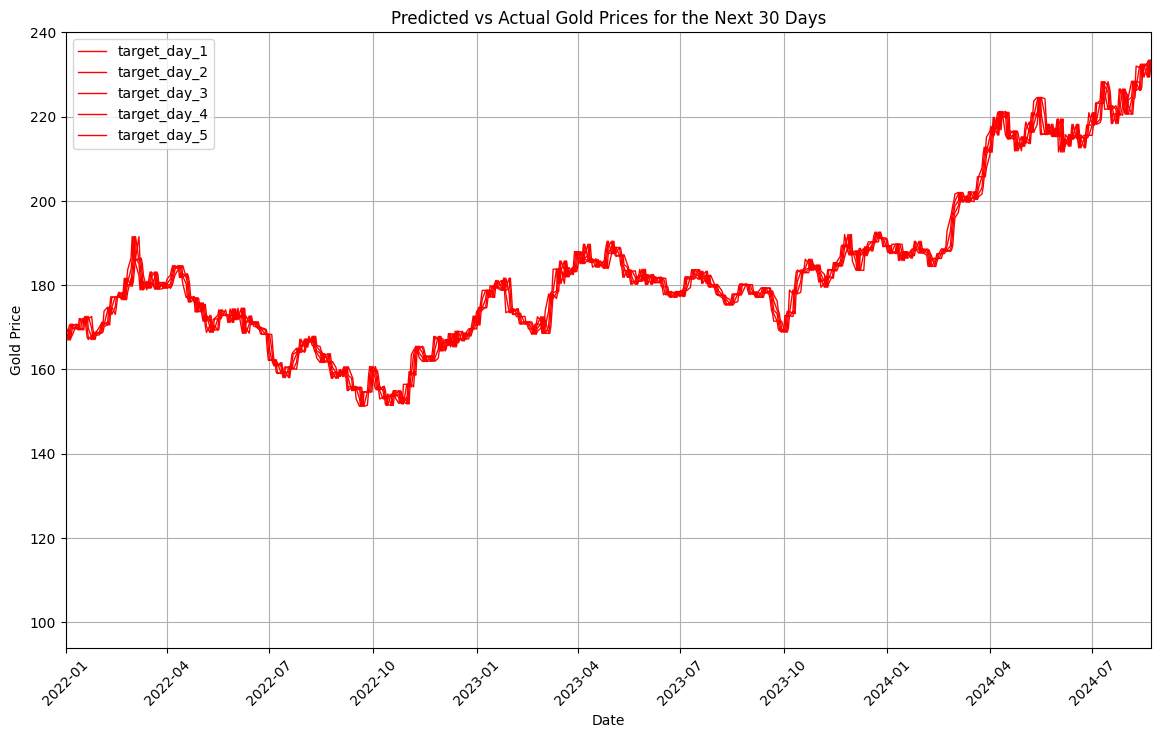

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor


# Initialize a DataFrame for the training data
# Initialize and train the model
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train_dropped, y_train_dropped)

# Make predictions
predictions = model.predict(X_test)

# Create a DataFrame for predictions
def plot_results(predictions):
    train_df = pd.DataFrame(y_train_dropped, index=X_train_dropped.index, 
                            columns=[f'target_day_{i+1}' for i in range(y_train_dropped.shape[1])])
    test_df = pd.DataFrame(y_test_dropped, index=X_test_dropped.index, 
                           columns=[f'target_day_{i+1}' for i in range(y_test_dropped.shape[1])])
    
    # Combine actual values for both train and test sets
    combined_actual_df = pd.concat([train_df, test_df], axis=0)
    print("Combined Actual Data (Head):")
    print(combined_actual_df.head())

    # Create DataFrame for predictions with multi-output columns
    predictions_df = pd.DataFrame(predictions, index=y_test_dropped.index, 
                                  columns=[f'Predicted Day {i+1}' for i in range(predictions.shape[1])])
    print("Predictions Data (Head):")
    print(predictions_df.head())

    # Plot actual gold prices for each output day
    plt.figure(figsize=(14, 8))
    for i in range(y_test_dropped.shape[1]):
        plt.plot(combined_actual_df.index, combined_actual_df[f'target_day_{i+1}'], 
                 label=f'target_day_{i+1}', color='red', linewidth=1)

    # Plot each predicted day as a separate line
    for i in range(predictions.shape[1]):
        plt.plot(predictions_df.index, predictions_df[f'Predicted Day {i+1}'], 
                 label=f'Predicted Day {i+1}')

    # Configure plot appearance
    plt.title('Predicted vs Actual Gold Prices for the Next 30 Days')
    plt.xlabel('Date')
    plt.xlim([pd.Timestamp('2022-01-01'), combined_actual_df.index.max()])

    plt.ylabel('Gold Price')
    plt.legend()
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.grid()
    plt.show()

plot_results(predictions)


In [14]:
df


,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Open,gold_High,gold_Low,gold_Close,...,dollar_rate_High,dollar_rate_Low,dollar_rate_Change %,cpi_CPI,ppi_PPI,is_holiday,target_day_1,gold_price_yesterday,gold_price_2days,gold_price_3days
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,95.44,98.50,98.97,95.34,251250.0,-3.30,117.930000,118.730003,117.750000,118.000000,...,80.71,80.08,0.75,235.288,203.800,0,119.290001,NaN,NaN,NaN
2014-01-03,93.96,95.47,95.74,93.86,215520.0,-1.55,118.639999,119.620003,118.589996,119.290001,...,80.89,80.49,0.20,235.288,203.800,0,119.500000,118.000000,NaN,NaN
2014-01-06,93.43,94.18,94.59,93.20,189380.0,-0.56,119.760002,120.389999,117.110001,119.500000,...,80.91,80.54,-0.17,235.288,203.800,0,118.820000,119.290001,118.000000,NaN
2014-01-07,93.67,93.60,94.22,93.35,177180.0,0.26,118.459999,118.919998,118.129997,118.820000,...,80.95,80.60,0.22,235.288,203.800,0,118.120003,119.500000,119.290001,118.000000
2014-01-08,92.33,93.96,94.18,92.26,244860.0,-1.43,117.989998,118.519997,117.500000,118.120003,...,81.17,80.83,0.24,235.288,203.800,0,118.459999,118.820000,119.500000,119.290001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-23,75.56,77.28,77.69,75.52,365120.0,-2.21,231.039993,232.729996,230.520004,232.020004,...,104.67,104.14,0.27,313.049,255.419,0,232.759995,229.369995,232.149994,232.460007
2024-08-26,75.56,77.28,77.69,75.52,365120.0,-2.21,233.449997,233.500000,232.059998,232.759995,...,104.67,104.14,0.27,313.049,255.419,0,233.389999,232.020004,229.369995,232.149994
2024-08-27,75.56,77.28,77.69,75.52,365120.0,-2.21,231.690002,233.470001,231.570007,233.389999,...,104.67,104.14,0.27,313.049,255.419,0,231.750000,232.759995,232.020004,229.369995


In [15]:
# trying to predict multiple days ahead
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

num_days = 5  # Number of days to predict
# Prepare target columns for 30-day predictions
for i in range(1, num_days + 1):
    df[f'target_day_{i}'] = df['gold_price'].shift(-i)

# Drop rows with NaN values from shifting
df = df.dropna()

# Separate features and targets
X = df.drop(columns=[f'target_day_{i}' for i in range(1, num_days + 1)])
y = df[[f'target_day_{i}' for i in range(1, num_days + 1)]]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)
plot_results(predictions)

KeyError: 'gold_price'

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test_dropped, predictions))
mae = mean_absolute_error(y_test_dropped, predictions)
r2 = r2_score(y_test_dropped, predictions)

print(f"Root Mean Square Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot residuals
residuals = y_test_dropped - predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test_dropped.index, residuals, color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [ ]:
import statsmodels.api as sm

# Add a constant term to the model (intercept)
X_train_dropped = sm.add_constant(X_train_dropped)
X_test_dropped = sm.add_constant(X_test_dropped)

# Fit the model using statsmodels OLS (Ordinary Least Squares)
model = sm.OLS(y_train_dropped, X_train_dropped).fit()

# Print out the summary of the model
print(model.summary())


In [ ]:
# Lasso Regression - Feature Selection
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming you have already created X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dropped)
X_test_scaled = scaler.transform(X_test_dropped)

# Initialize the Lasso model with a chosen alpha (regularization strength)
alpha = 0.1  # You may need to adjust this value
lasso_model = Lasso(alpha=alpha)

# Fit the Lasso model
lasso_model.fit(X_train_scaled, y_train_dropped)

# Predictions
y_pred = lasso_model.predict(X_test_scaled)

# Calculate and print evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_dropped, y_pred))
mae = mean_absolute_error(y_test_dropped, y_pred)

print(f"Root Mean Square Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

# Get the coefficients and the corresponding feature names
coef = pd.Series(lasso_model.coef_, index=X_train_dropped.columns)
print("Lasso Coefficients:")
print(coef[coef != 0])  # Print only significant features (non-zero coefficients)

# Optional: Plot the coefficients
plt.figure(figsize=(10, 6))
coef.plot(kind='bar')
plt.title('Lasso Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()


In [ ]:
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train_dropped.index]

# Drop rows with NaN in X_test and y_test
X_test_dropped = X_test.dropna()
y_test_dropped = y_test.loc[X_test_dropped.index]  # Drop NaNs based on indices in X_test_dropped

# Ensure that y_test_dropped does not contain NaN values
X_test_dropped = X_test_dropped.dropna()
y_test_dropped = y_test_dropped.dropna()

# Check if indices still match after dropping NaNs
common_index = X_test_dropped.index.intersection(y_test_dropped.index)
X_test_dropped = X_test_dropped.loc[common_index]
y_test_dropped = y_test_dropped.loc[common_index]
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_dropped, y_train_dropped)

# Predict on test data
y_pred = model.predict(X_test_dropped)
pred_index = X_test_dropped.index

# Create a DataFrame for predictions
linear_reg_predictions_df = pd.DataFrame(y_pred, index=pred_index, columns=['Predictions'])
# Assuming test_data is the DataFrame with actual values and it has the same index as X_test_dropped
# Combine predictions and actual test data
test_data = y_test_dropped.to_frame()  # Ensure test_data is a DataFrame
linear_reg_predictions_df = test_data.join(linear_reg_predictions_df)
linear_reg_predictions_df.index = linear_reg_predictions_df.index + pd.DateOffset(days=1)

# Evaluate the model
mse = mean_squared_error(y_test_dropped, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_dropped, y_pred)
mae = mean_absolute_error(y_test_dropped, y_pred)

print("Linear Regression Model Summary")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

In [ ]:
with open('modelResults/linear_reg_predictions_df', 'wb') as file:
    # Serialize the object and write it to the file
    pkl.dump(linear_reg_predictions_df, file)

In [ ]:
import pandas as pd

# Assuming `gold_prices` is your DataFrame with actual prices and `predictions` is a Series of predicted prices
gold_prices['Returns'] = gold_prices['gold_price'].pct_change()  # Actual returns
predictions['Returns'] = predictions.pct_change()  # Predicted returns
